In [1]:
# Coded by Leonardo da Silva Garcia Leite, Jan 2025
# Dr. Aurora Clark's Group - University of Utah


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression

In [2]:
# This configures the plots
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.ticker


# Set maximum number of ticks to 5
mpl.ticker.MaxNLocator.default_params['nbins'] = 5  # Globally set maximum ticks
## Set maximum number of ticks to 5
#axii.xaxis.set_major_locator(MaxNLocator(5))  # For x-axis
#axii.yaxis.set_major_locator(MaxNLocator(5))  # For y-axis

#second try to ajust sizes of parameters
fontScaling= 1

# Desired font sizes and tick size
label_fontsize = fontScaling*12  # pt
title_fontsize = fontScaling*14  # pt
tick_fontsize = fontScaling*10   # pt (you can adjust this as needed)
legend_fontsize = fontScaling*10
desired_width = 4.2#8.4#4.2 #6    # inches (adjust as needed)  , 1 inch = 72 points (pt)
border_thickness = 1.5 #t
tick_thickness = 1.5 # pt
scatter_size = 50
plot_linewidth = 1.0

# Use mpl.update to apply rcParams globally
mpl.rcParams.update({
    'text.usetex': False,  # Use LaTeX for text rendering
    'font.size': label_fontsize,  # Base font size for labels
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': label_fontsize,  # Label font size
    'xtick.labelsize': tick_fontsize,  # x-axis tick label size
    'ytick.labelsize': tick_fontsize,  # y-axis tick label size
    'xtick.major.width': tick_thickness,
    'ytick.major.width': tick_thickness,
    'xtick.direction': 'in',  # Move x-axis ticks inside
    'ytick.direction': 'in',  # Move y-axis ticks inside 
    'legend.fontsize': legend_fontsize,     # Legend font size
    'axes.linewidth': border_thickness,  # Border thickness for the entire plot
    'figure.figsize': [desired_width, desired_width * 0.75]  # Aspect ratio
})

print('reference font value:', label_fontsize/fontScaling,' font scaling:', fontScaling,' effective font size:',label_fontsize )
#xtick.minor.widthscatter_size

reference font value: 12.0  font scaling: 1  effective font size: 12


In [3]:
#import data
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0)
df = df.drop(201) #for deepika
df

,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


In [4]:
df[df['has ions?']==1]['ExtractantName'].value_counts()

TODGA        2735
DEHiBA        499
TEHDGA        423
DEHBA         236
DMDODGA       163
TBDGA         112
TDDGA         107
DHOA          100
DMDOHEMA       99
THDGA          49
D3DODGA        41
DOHyA          41
DEHPRA         38
DEHAA          38
DEHPVA         36
DHEHHA         27
MIDOA          25
TBP            24
TDGA           13
DMDBTDMA       12
Me2-TODGA      12
HDEHDGA        10
TDdDGA          7
DEHDODGA        6
TPDGA           5
TOA             4
DBBA            2
DBHA            2
DBEHHA          2
DEHHA           2
DOOA            2
DHHA            1
BHHA            1
Name: ExtractantName, dtype: int64

In [5]:
def activityCoefNO3(Cacid):
    CmetalIon = 0
    zMetal = -3
    
    #Debey Huckel equation for A=0.51 B=0.31, z=-1, ra = 3 Ang, I = 1/2 [HNO3](-1)^2
    logg = (-0.51*np.sqrt(0.5*Cacid + 0.5*(CmetalIon)*zMetal*zMetal) )/(1+0.32*3*3*np.sqrt(0.5*Cacid+ + 0.5*(CmetalIon)*zMetal*zMetal))
    
    # higher order interaction, see Geist,Berthon,Charbonnel, Mullich (2020)
    loggcorrection = 0.07*(0.995*Cacid+0.04*Cacid*Cacid) +0.0001*(0.995*Cacid+0.04*Cacid*Cacid)**1 +  -0.00012*(0.995*Cacid+0.04*Cacid*Cacid)**1
    return np.power(10, logg + loggcorrection)

def activityNO3(row):
    cacid = row['Cacid (M)']
    if cacid > 0:
        return activityCoefNO3(cacid)*cacid
    

df['(NO3)-'] = df.apply(activityNO3, axis=1)  

In [6]:
#calculate log of some fields..
def logDion(row):
    Dion = row['D(ion)']
    if (Dion>0) :
        return np.log10(Dion)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log10(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log10(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    if (Extractantini > 0) :
        return np.log10(Extractantini)


df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDion'] = df.apply(logDion, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)

In [7]:
# to calculate kh for fixed acidity
def logAcidOrg_aq(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)

def logExtractant_AcidOrg(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac)):
        return np.log10(cextrac-cacidorg)

# to calculate kh for fixed [DGA]
def logAcidOrg_aqExtractant(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac) and (cacidorg>0)):
        return np.log10(cacidorg)-np.log10(cextrac-cacidorg)

def logAcidOrgAcid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']

    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacid-cacidorg)


df['logAcidOrg_aq'] = df.apply(logAcidOrg_aq, axis=1)
df['logExtractant_AcidOrg'] = df.apply(logExtractant_AcidOrg, axis=1)

df['logAcidOrg_aqExtractant'] = df.apply(logAcidOrg_aqExtractant, axis=1)
df['logAcidOrgAcid'] = df.apply(logAcidOrgAcid, axis=1)

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_55235/3604846201.py:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_55235/3604846201.py:12: RuntimeWarning: invalid value encountered in log10
  return np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_55235/3604846201.py:19: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_55235/3604846201.py:26: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacid-cacidorg)


In [8]:
'''
This function will fit two different linear sections will return two different fittings, and the point of interception


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]

'''
#do some fitting with the data

def find_closest_index(vector, target):
    vector = np.array(vector)  # Convert the list to a numpy array for efficient computation
    index = np.abs(vector - target).argmin()  # Find the index of the minimum absolute difference
    return index

def calculateCAC2linesCluster(df, name, endred,iniblue ):

    #df passed should be x and y only
    npoints = len(df.index)
    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0

    bestResidualsForward = 99999
    bestResidualsBackward = 99999

    #get all values
    x = pd.to_numeric(df.iloc[:, 0], errors='coerce').values
    y = pd.to_numeric(df.iloc[:, 1], errors='coerce').values


    #find the points correspondent to the value
    try:
        indexred = find_closest_index(x,endred)
    except:
        indexred = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    try:
        indexblue = find_closest_index(x,iniblue)
    except:
        indexblue = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    #print('index red', indexred, 'index blue', indexblue)
    #print('x red',x[indexred], 'xblue', x[indexblue])
        
    #blue, forward fitting    
    if npoints < 2:
        print("Data from:", name, " is too short: ",npoints)

    else:
        #print(x[indexblue:])
        #print(y[indexblue:])
        
        #print(x.dtype)  # Should be 'float64'
        #print(y.dtype)  # Should be 'float64'

        px,r,_,_,_ = np.polyfit( x[indexblue:], y[indexblue:],1, full=True)
        #print('i:',i, ' r:',r )


        if ( r.size>0)  and (r < bestResidualsForward):
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[indexblue:])
            # Calculate the mean of observed data
            y_mean = np.mean(y[indexblue:])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[indexblue:] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[indexblue:] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsForward = r2
            bestAForward = px[0]
            bestBForward = px[1]
            bestPoints = indexblue

        print('Best results forward: ini:',bestPoints,':',npoints,' fitted the line:',bestAForward,'*x +',bestBForward, ' residuals:',bestResidualsForward)

        
        #fitting red, backward fit
        px,r,_,_,_ = np.polyfit( x[0:indexred], y[0:indexred],1, full=True)

        if ( r.size>0)  and (r < bestResidualsBackward):
            
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[0:indexred])
            # Calculate the mean of observed data
            y_mean = np.mean(y[0:indexred])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[0:indexred] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[0:indexred] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsBackward = r2
            bestABackward = px[0]
            bestBBackward = px[1]
            bestPoints = indexred#int(percent*npoints)#i

        print('Best results backward: ini: 0:',bestPoints,' fitted the line:',bestABackward,'*x +',bestBBackward, ' residuals:',bestResidualsBackward)

        if np.abs(bestABackward-bestAForward) < 0.0001:
            print('ERROR - 2 LINE FITTING : LINES DO NOT INTERCEPT')
            return 0
        else:
            #(b2-b1)/(m1-m2)  kink is x intersection
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)

        if( (kink > x.max()) or (kink<x.min())):
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT IN VALID RANGE:', kink, '(',x.min(),x.max(),')')
            #return 0



        #find the Y value of the kink
        yCrit = bestAForward*kink+bestBForward
        print('kink is in x ',kink,  ' kink in y:',yCrit  )

        axii.plot(x[indexblue-1:],bestAForward*x[indexblue-1:]+bestBForward, c='blue', alpha=0.5, label=f'x-kink:{kink:.2f} y-kink:{yCrit:.2f}')
        axii.plot(x[:indexred+1],bestABackward*x[:indexred+1]+bestBBackward, c='red', alpha=0.5)

        axii.axvline(x = x[indexred], color = 'blue', alpha=0.015)
        axii.axvline(x = x[indexblue], color = 'blue', alpha=0.015)

        axii.axvline(x = kink, color = 'green', alpha=0.15)


        return kink, yCrit
    

# Stoichiometry computation
$$ \log D = n \log [TODGA] + ( 3 \log[NO3-]+ \log K_{ex} ) $$ 


8165
336
Ransac failed for  (298.15, 'TODGA', 'n-dodecane', 'HNO3', 1.0, 'Eu', 'alisonOZ')
Ransac failed for  (298.15, 'TODGA', 'n-dodecane', 'HNO3', 3.0, 'Eu', 'alisonOZ')
Ransac failed for  (298.15, 'TODGA', 'n-dodecane', 'HNO3', 3.0, 'Eu', 'dhawa2021')
References used: {'ansari2006', 'sasakiRapold2007', 'suzuki2004', 'sasaki2013MIDOATODGA', 'sasakiZhiSugoKimura2012', 'sasaki2015', 'arisaka2011', 'zhizhusasaki2004', 'gujar2010'}
indices on the indexes list: [452, 446, 447, 448, 449, 450, 463, 791, 809, 792, 793, 466, 467, 468, 469, 470, 181, 182, 183, 187, 705, 704, 703, 699, 700, 701, 3529, 3530, 3531, 3532, 834, 833, 832, 830, 702, 692, 693, 694, 695, 696, 3024, 3023, 3022, 1757, 1756, 1755, 1754, 1753, 1840, 1839, 1841, 1842, 1843, 1035, 1033, 1037, 1038, 3533, 3534, 3535, 3537, 3518, 3519, 3516, 3528]
336
65
Points in the series
       Cacid (M) IonName      ref citation  Temp (K)
791         1.0      Am       arisaka2011    298.15
3529        1.0      Am        suzuki2004    298

/Users/lleite/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lleite/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lleite/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lleite/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


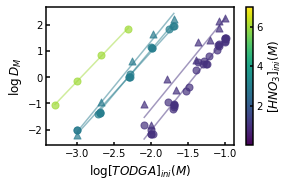

Listplot  {'suzuki2004', 'sasaki2013MIDOATODGA', 'sasakiZhiSugoKimura2012', 'arisaka2011', 'zhizhusasaki2004'}
0.8481574285282023
1.0


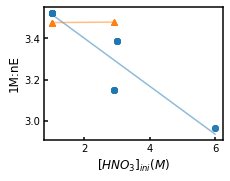

In [30]:
'''  TODGA N-dodecane  '''


import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize


import re
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model




# Define the custom function to remove oxidation state
def remove_oxidation_state(ion_name):
    # Ensure the input is a string
    if isinstance(ion_name, str):
        # Regular expression to match and capture the base element name
        match = re.match(r'(\w+)\((?:[IVXLCDM]+|[-+]?[1-9])\)', ion_name)
        if match:
            return match.group(1)
    return ion_name  # Return as-is if no match or not a string


df1 = df.copy()
df1['IonName'] = df1['IonName'].apply(remove_oxidation_state)

# Dictionary to map old values to new values
solvent_mapping = {'ndodecane': 'n-dodecane', 'noctane':'n-octane', 'ndecane':'n-decane',
                 '1octane':'n-octane','nhexane':'n-hexane','nheptane':'n-heptane','heptane':'n-heptane',
                 'noctanol':'n-octanol','1octanol':'1-octanol','decane':'n-decane',
                'ntetradecane':'n-tetradecane', 'n-Dodecane':'n-dodecane'
                }

# Replace the values in the 'solvent' column using the dictionary
df1['SolventName'].replace(solvent_mapping, inplace=True)


dfred2all = df1.loc[ (df1['ExtractantName'].isin(['TODGA']))
             & (df1['IonName'].isin(['Am','Am(III)','Eu','Eu(III)']))
                & ( df1['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))
                #& (df1['IonName'].isin(['Cm','Pd','Pu','Th', 'U', 'Am','Eu','Sr']))
                #& (df1['IonName'].isin(['Am','Eu','Ca','Nd', 'Sr', 'Zr']))

     
                & (~df1['ref citation'].isin(['mowafy2007','a']))
                     & (df1['Temp (K)'].isin([298.15,298]))   #limits to same temperature, but there are more data for other T(K) 
               ].copy()

dfred2all['coef'] = None
print(len(df1.index))
print(len(dfred2all.index))

plotList = []
indexes = [] #this will retain all the usefull fitting, the ones that have enough points and come from same reference
             # after we will group this points independent of the reference and do a "mean fitting"
             # if we do not do it this way, points that dont come from good fittings messes up the mean 



# Group and plot
for g, d in dfred2all.sort_values(by=['IonName', 'Cacid (M)', 'logExtractant']).groupby(
    [dfred2all['Temp (K)'], dfred2all['ExtractantName'], dfred2all['SolventName'],
     dfred2all['AcidName'], dfred2all['Cacid (M)'], dfred2all['IonName']
     ,dfred2all['ref citation']
    ]
):
    #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])

    y = d['logDion'].values
    x1 = d['logExtractant'].values
    x = d['logExtractant'].values.reshape(-1, 1)

    if len(x) > 2:  # Only fit if there's enough data
        #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])

        try:
            ransac = linear_model.RANSACRegressor() #ransac is a "robust linear fitting" that ignores outliers
            ransac.fit(x, y)
            temp_coef = ransac.estimator_.coef_
        except:
            print('Ransac failed for ', g)
            temp_coef = 0
            dfred2all.loc[d.index, 'coef'] = 0


        if temp_coef != 0:   
            # Store results
            plotList.append(d['ref citation'].iloc[0])

            # Save the index of this set of points
            for item in d.index:
                indexes.append(item)

print('References used:',set(plotList))




##############
#########
#####
# replot using only the valid indexes of the last calcualtion...
####
#########
##############



print('indices on the indexes list:', indexes)

dfindex = dfred2all.loc[indexes]



dfindex['coef'] = None
print(len(dfred2all.index))
print(len(dfindex.index))

plotList = []


markers_map_ions = {
    'Am': 'o',  # Circle marker
    'Eu': '^',  # Triangle marker
    'Am(III)': 's',  # Square marker
    'Eu(III)': 'H', #hexagon
    'noctane' : '*',
    'tphkerosene': 'p' #pentagon
}

fig, axii = plt.subplots()

k2 =0
cumulated = 0


# Create a colormap and normalization for acid concentration
cmap = cm.viridis  # Choose a colormap (e.g., viridis, plasma, coolwarm)
norm = Normalize(vmin=dfred2all['Cacid (M)'].min(), vmax=dfred2all['Cacid (M)'].max())

# Group and plot
for g, d in dfindex.sort_values(by=['IonName', 'Cacid (M)', 'logExtractant']).groupby(
    [dfindex['Temp (K)'], dfindex['ExtractantName'], dfindex['SolventName'],
     dfindex['AcidName'], dfindex['Cacid (M)'], dfindex['IonName']
     #,dfindex['ref citation']
    ]
):
    #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])
    y  = d['logDion'].values
    x1 = d['logExtractant'].values
    x  = d['logExtractant'].values.reshape(-1, 1)

    if len(x) > 2:  # Only fit if there's enough data
        print('Points in the series\n',d[['Cacid (M)','IonName','ref citation','Temp (K)']])
        #print('Points in the series\n',d[['ExtractantName', 'AcidName','SolventName','ref citation', 'Temp (K)']])

        try:
            ransac = linear_model.RANSACRegressor()
            ransac.fit(x, y)
            temp_coef = ransac.estimator_.coef_
        except:
            print('Ransac failed for ', g)
            temp_coef = 0
            dfindex.loc[d.index, 'coef'] = 0


        if temp_coef != 0:
            k2+=1
            markerget = markers_map_ions.get(d['IonName'].iloc[0],'x')


            acid_value = g[4]
            acid_color = cmap(norm(acid_value))  # Map acid concentration to a color

            # Scatter plot
            scatter = axii.scatter(x1, y, label=f"{g[5]} at [acid]: {acid_value:.2f} {g[-1]}{g}", marker=markerget,
                                   s=scatter_size, alpha=0.7, color=acid_color)

            # RANSAC fit line
            plt.plot(x, ransac.predict(x), alpha=0.5, color=acid_color)

            # Store results
            dfindex.loc[d.index, 'coef'] = ransac.estimator_.coef_[0]
            plotList.append(d['ref citation'].iloc[0])
            cumulated += len(d.index)
                

# Add color bar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar
cbar = plt.colorbar(sm, ax=axii)
cbar.set_label(r'$[HNO_3]_{ini} (M)$')


print('number of points ploted:',cumulated)
print('number of usefull fittings: ',k2)
axii.set_xlabel(r'$\log [TODGA]_{ini} (M)$')
axii.set_ylabel(r'$\log D_M$')
axii.legend(loc = 'center left', bbox_to_anchor=(0.75,0.5))

axii.legend().set_visible(False)
fig.set_size_inches(desired_width, desired_width*0.67, forward=True)
#fig.set_size_inches(3.44, 2.334, forward=True)
#fig.set_size_inches(11, 6, forward=True)
fig.tight_layout()
plt.show()




print('Listplot ',set(plotList))
##################################
fig, axii = plt.subplots()

# Group and plot data
for g, d in dfindex.sort_values(by=['Cacid (M)']).groupby(['IonName', 'Temp (K)']):

    if len(d) >1:
        markerget = markers_map_ions.get(d['IonName'].iloc[0],'x')

        #print('Current points to be fitted?:',d[['Cacid (M)','coef']])
        # Scatter plot with color based on IonName
        axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g[0]}', alpha=0.5, marker=markerget)

        # Fit and plot linear regression model
        x = d['Cacid (M)'].values.reshape(-1,1)
        y = d['coef'].values
        
        
        # Fit linear regression 
        model = LinearRegression().fit(x,y)
        
        # Calculate the residual sum of squares (SS_res)
        ss_res = np.sum((y - model.predict(x))**2)
        # Calculate the total sum of squares (SS_tot)
        ss_tot = np.sum((y - np.mean(y))**2)
        # Calculate R^2
        r2 = 1 - (ss_res / ss_tot)
        print(r2)
        
        plt.plot(x, model.predict(x), alpha=0.5 , label=f'y= {model.coef_[0]:0.3f}*x+{model.intercept_:.3f} R2={r2:.3f}')
        
        ransac = linear_model.RANSACRegressor()
        ransac.fit(x, y)
        #temp_coef = ransac.estimator_.coef_
        
        # RANSAC fit line
        #plt.plot(x, ransac.predict(x), alpha=0.5, color=acid_color)
        
        #to fit multiple lines if needed
        #calculateCAC2linesCluster(d[['Cacid (M)','coef']].drop_duplicates().copy(),
        #                          'noname',1.4,1.4)

# Labels, legend, and layout
axii.set_xlabel(r'$[HNO_3]_{ini} (M)$')
axii.set_ylabel(r'1M:nE')
axii.legend(loc='center left', bbox_to_anchor=(0.35, 0.9), fontsize=7)
#fig.set_size_inches(11.0, 8.0, forward=True)
#fig.set_size_inches(3.44, 2.334, forward=True)

axii.legend().set_visible(False)
fig.set_size_inches(desired_width*0.8, desired_width*0.76*0.84, forward=True)
fig.tight_layout()
plt.show()





8165
124
References used: {'wessling2020'}
indices on the indexes list: [7205, 7204, 7203, 7202, 7201, 7211, 7199, 7198, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7200, 7144, 7164, 7142, 7108, 7030, 7031, 7032, 7033, 7034, 7035, 7037, 7044, 7038, 7039, 7040, 7041, 7042, 7043, 7029, 7028, 7027, 7026, 7025, 7024, 7023, 7022, 7021, 7020, 7019, 7018]
124
53
Points in the series
       Cacid (M) IonName  ref citation  Temp (K)
7205       0.29      Am  wessling2020    293.15
7204       0.29      Am  wessling2020    293.15
7203       0.29      Am  wessling2020    293.15
7202       0.29      Am  wessling2020    293.15
7201       0.29      Am  wessling2020    293.15
7211       0.29      Am  wessling2020    293.15
Points in the series
       Cacid (M) IonName  ref citation  Temp (K)
7199       0.48      Am  wessling2020    293.15
7198       0.48      Am  wessling2020    293.15
7183       0.48      Am  wessling2020    293.15
7184       0.48      Am  wessl

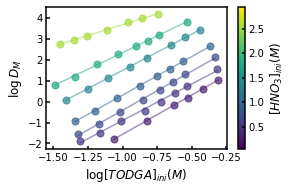

Listplot  {'wessling2020'}
0.7881646667050068
Best results forward: ini: 4 : 7  fitted the line: -1.232825029230436 *x + 5.268858537144292  residuals: 0.9762322058507653
Best results backward: ini: 0: 4  fitted the line: 0.02096467835806059 *x + 3.6691013139330213  residuals: 0.0022056608153023793
kink is in x  1.2759374347458943  kink in y: 3.695850931857478


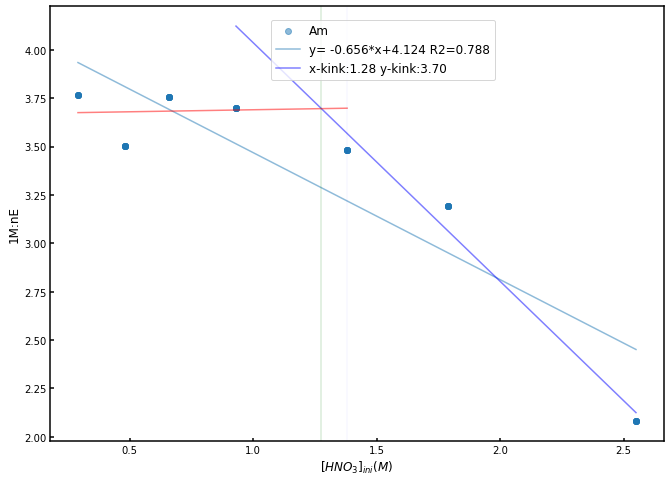

In [36]:
'''  TODGA in DIPB  only one ref  '''



# Define the custom function to remove oxidation state
def remove_oxidation_state(ion_name):
    # Ensure the input is a string
    if isinstance(ion_name, str):
        # Regular expression to match and capture the base element name
        match = re.match(r'(\w+)\((?:[IVXLCDM]+|[-+]?[1-9])\)', ion_name)
        if match:
            return match.group(1)
    return ion_name  # Return as-is if no match or not a string


df1 = df.copy()
df1['IonName'] = df1['IonName'].apply(remove_oxidation_state)

# Dictionary to map old values to new values
solvent_mapping = {'ndodecane': 'n-dodecane', 'noctane':'n-octane', 'ndecane':'n-decane',
                 '1octane':'n-octane','nhexane':'n-hexane','nheptane':'n-heptane','heptane':'n-heptane',
                 'noctanol':'n-octanol','1octanol':'1-octanol','decane':'n-decane',
                'ntetradecane':'n-tetradecane', 'n-Dodecane':'n-dodecane'
                }

# Replace the values in the 'solvent' column using the dictionary
df1['SolventName'].replace(solvent_mapping, inplace=True)


dfred2all = df1.loc[ (df1['ExtractantName'].isin(['TODGA']))
             & (df1['IonName'].isin(['Am','Am(III)','Eu','Eu(III)']))
               # & ( df1['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))
                #& (df1['IonName'].isin(['Cm','Pd','Pu','Th', 'U', 'Am','Eu','Sr']))
                #& (df1['IonName'].isin(['Am','Eu','Ca','Nd', 'Sr', 'Zr']))

     
                & (df1['ref citation'].isin(['wessling2020']))
               ].copy()

dfred2all['coef'] = None
print(len(df1.index))
print(len(dfred2all.index))

plotList = []
indexes = [] #this will retain all the usefull fitting, the ones that have enough points and come from same reference
             # after we will group this points independent of the reference and do a "mean fitting"
             # if we do not do it this way, points that dont come from good fittings messes up the mean 



# Group and plot
for g, d in dfred2all.sort_values(by=['IonName', 'Cacid (M)', 'logExtractant']).groupby(
    [dfred2all['Temp (K)'], dfred2all['ExtractantName'], dfred2all['SolventName'],
     dfred2all['AcidName'], dfred2all['Cacid (M)'], dfred2all['IonName']
     ,dfred2all['ref citation']
    ]
):
    #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])

    y = d['logDion'].values
    x1 = d['logExtractant'].values
    x = d['logExtractant'].values.reshape(-1, 1)

    if len(x) > 2:  # Only fit if there's enough data
        #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])

        try:
            ransac = linear_model.RANSACRegressor() #ransac is a "robust linear fitting" that ignores outliers
            ransac.fit(x, y)
            temp_coef = ransac.estimator_.coef_
        except:
            print('Ransac failed for ', g)
            temp_coef = 0
            dfred2all.loc[d.index, 'coef'] = 0


        if temp_coef != 0:   
            # Store results
            plotList.append(d['ref citation'].iloc[0])

            # Save the index of this set of points
            for item in d.index:
                indexes.append(item)

print('References used:',set(plotList))




##############
#########
#####
# replot using only the valid indexes of the last calcualtion...
####
#########
##############



print('indices on the indexes list:', indexes)

dfindex = dfred2all.loc[indexes]



dfindex['coef'] = None
print(len(dfred2all.index))
print(len(dfindex.index))

plotList = []


markers_map_ions = {
    'Am': 'o',  # Circle marker
    'Eu': '^',  # Triangle marker
    'Am(III)': 's',  # Square marker
    'Eu(III)': 'H', #hexagon
    'noctane' : '*',
    'tphkerosene': 'p' #pentagon
}

fig, axii = plt.subplots()

k2 =0
cumulated = 0


# Create a colormap and normalization for acid concentration
cmap = cm.viridis  # Choose a colormap (e.g., viridis, plasma, coolwarm)
norm = Normalize(vmin=dfred2all['Cacid (M)'].min(), vmax=dfred2all['Cacid (M)'].max())

# Group and plot
for g, d in dfindex.sort_values(by=['IonName', 'Cacid (M)', 'logExtractant']).groupby(
    [dfindex['Temp (K)'], dfindex['ExtractantName'], dfindex['SolventName'],
     dfindex['AcidName'], dfindex['Cacid (M)'], dfindex['IonName']
     #,dfindex['ref citation']
    ]
):
    #print('Points in the series\n',d[['logExtractant', 'logDion','Cacid (M)','ref citation']])
    y  = d['logDion'].values
    x1 = d['logExtractant'].values
    x  = d['logExtractant'].values.reshape(-1, 1)

    if len(x) > 2:  # Only fit if there's enough data
        print('Points in the series\n',d[['Cacid (M)','IonName','ref citation','Temp (K)']])
        #print('Points in the series\n',d[['ExtractantName', 'AcidName','SolventName','ref citation', 'Temp (K)']])

        try:
            ransac = linear_model.RANSACRegressor()
            ransac.fit(x, y)
            temp_coef = ransac.estimator_.coef_
        except:
            print('Ransac failed for ', g)
            temp_coef = 0
            dfindex.loc[d.index, 'coef'] = 0


        if temp_coef != 0:
            k2+=1
            markerget = markers_map_ions.get(d['IonName'].iloc[0],'x')


            acid_value = g[4]
            acid_color = cmap(norm(acid_value))  # Map acid concentration to a color

            # Scatter plot
            scatter = axii.scatter(x1, y, label=f"{g[5]} at [acid]: {acid_value:.2f} {g[-1]}{g}", marker=markerget,
                                   s=scatter_size, alpha=0.7, color=acid_color)

            # RANSAC fit line
            plt.plot(x, ransac.predict(x), alpha=0.5, color=acid_color)

            # Store results
            dfindex.loc[d.index, 'coef'] = ransac.estimator_.coef_[0]
            plotList.append(d['ref citation'].iloc[0])
            cumulated += len(d.index)
                

# Add color bar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar
cbar = plt.colorbar(sm, ax=axii)
cbar.set_label(r'$[HNO_3]_{ini} (M)$')


print('number of points ploted:',cumulated)
print('number of usefull fittings: ',k2)
axii.set_xlabel(r'$\log [TODGA]_{ini} (M)$')
axii.set_ylabel(r'$\log D_M$')
axii.legend(loc = 'center left', bbox_to_anchor=(0.75,0.5))

axii.legend().set_visible(False)
fig.set_size_inches(desired_width, desired_width*0.67, forward=True)
#fig.set_size_inches(3.44, 2.334, forward=True)
#fig.set_size_inches(11, 6, forward=True)
fig.tight_layout()
plt.show()




print('Listplot ',set(plotList))
##################################
fig, axii = plt.subplots()

# Group and plot data
for g, d in dfindex.sort_values(by=['Cacid (M)']).groupby(['IonName', 'Temp (K)']):

    if len(d) >1:
        markerget = markers_map_ions.get(d['IonName'].iloc[0],'x')

        #print('Current points to be fitted?:',d[['Cacid (M)','coef']])
        # Scatter plot with color based on IonName
        axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g[0]}', alpha=0.5, marker=markerget)

        # Fit and plot linear regression model
        x = d['Cacid (M)'].values.reshape(-1,1)
        y = d['coef'].values
        
        
        # Fit linear regression 
        model = LinearRegression().fit(x,y)
        
        # Calculate the residual sum of squares (SS_res)
        ss_res = np.sum((y - model.predict(x))**2)
        # Calculate the total sum of squares (SS_tot)
        ss_tot = np.sum((y - np.mean(y))**2)
        # Calculate R^2
        r2 = 1 - (ss_res / ss_tot)
        print(r2)
        
        plt.plot(x, model.predict(x), alpha=0.5 , label=f'y= {model.coef_[0]:0.3f}*x+{model.intercept_:.3f} R2={r2:.3f}')
        
        #ransac = linear_model.RANSACRegressor()
        #ransac.fit(x, y)
        #temp_coef = ransac.estimator_.coef_
        
        # RANSAC fit line
        #plt.plot(x, ransac.predict(x), alpha=0.5, color=acid_color)
        
        #to fit multiple lines if needed
        calculateCAC2linesCluster(d[['Cacid (M)','coef']].drop_duplicates().copy(),
                                  'noname',1.4,1.4)

# Labels, legend, and layout
axii.set_xlabel(r'$[HNO_3]_{ini} (M)$')
axii.set_ylabel(r'1M:nE')
axii.legend(loc='center left', bbox_to_anchor=(0.35, 0.9), fontsize=12)
#fig.set_size_inches(11.0, 8.0, forward=True)
#fig.set_size_inches(3.44, 2.334, forward=True)

#axii.legend().set_visible(False)
fig.set_size_inches(desired_width*0.8, desired_width*0.76*0.84, forward=True)
fig.set_size_inches(11.0, 8.0, forward=True)
plt.show()
